![image](competi.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from tensorflow import keras
from tensorflow.keras import layers

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [256]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [258]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


Text(0.5, 0, 'table')

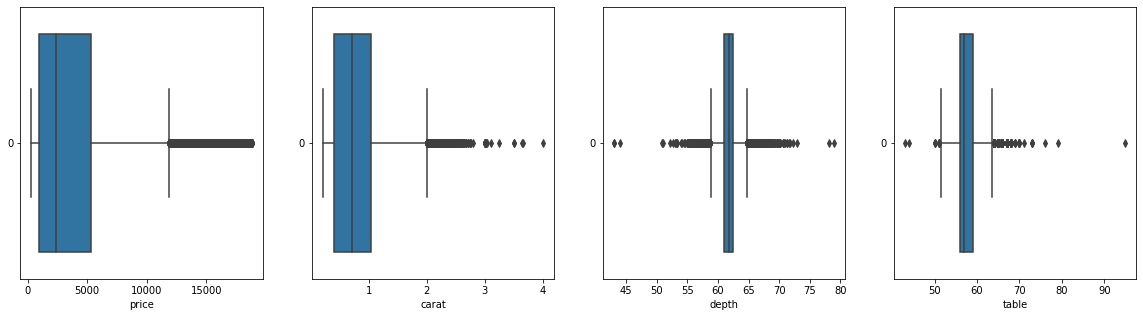

In [259]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
sns.boxplot(ax=ax[0], data=df['price'], orient='h')
ax[0].set_xlabel('price')
sns.boxplot(ax=ax[1], data=df['carat'], orient='h')
ax[1].set_xlabel('carat')
sns.boxplot(ax=ax[2], data=df['depth'], orient='h')
ax[2].set_xlabel('depth')
sns.boxplot(ax=ax[3], data=df['table'], orient='h')
ax[3].set_xlabel('table')

In [260]:
df.shape

(40345, 10)

In [261]:
df = df[~((df['depth'] < 45) | (df['depth'] > 75))]
df = df[~(df['carat'] > 3.8)]
df = df[~((df['table'] < 48) | (df['table'] > 90))]

In [262]:
df.shape

(40336, 10)

<AxesSubplot:>

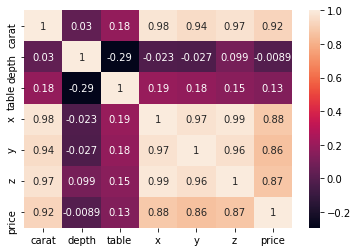

In [263]:
sns.heatmap(df.corr(), annot=True)

In [264]:
df = df.drop(['depth'], axis=1)

In [265]:
df['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [266]:
df['color'].unique()

array(['H', 'D', 'F', 'G', 'I', 'E', 'J'], dtype=object)

In [267]:
df['clarity'].unique()

array(['VS2', 'VVS2', 'VS1', 'IF', 'SI1', 'SI2', 'VVS1', 'I1'],
      dtype=object)

In [268]:
diccionario_cut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut'] = df['cut'].apply(lambda x: diccionario_cut[x])
diccionario_color = dict(zip(['D', 'E', 'F', 'G', 'H', 'I', 'J'], [6, 5, 4, 3, 2, 1, 0]))
df['color'] = df['color'].apply(lambda x: diccionario_color[x])
diccionario_clarity = dict(zip(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], [7, 6, 5, 4, 3, 2, 1, 0]))
df['clarity'] = df['clarity'].apply(lambda x: diccionario_clarity[x])

In [269]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price
0,1.21,4,2,3,57.0,6.73,6.70,4.23,6134
1,0.28,2,6,5,56.0,4.14,4.17,2.66,532
2,0.42,3,4,4,58.0,4.86,4.82,2.96,1103
3,0.26,4,2,7,57.0,4.16,4.12,2.53,600
4,1.10,1,3,2,57.0,6.52,6.55,4.14,4997


In [270]:
target = df['price']
df = df.drop('price', axis=1)

In [271]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [272]:
df.shape

(40336, 8)

In [273]:
#pca = PCA(n_components=df.shape[1] -2)
#pca.fit_transform(df)
#plt.plot([x for x in range(df.shape[1] - 1, 1, -1)], pca.explained_variance_)

In [274]:
#pca = PCA(n_components=0.95)
#df = pca.fit_transform(df)

In [275]:
df.shape

(40336, 8)

Hacemos lo mismo con el de predicción

In [276]:
df_pred = pd.read_csv("diamonds_test.csv", index_col=0)

In [277]:
df_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [278]:
df_pred = df_pred.drop(['depth'], axis=1)
df_pred['cut'] = df_pred['cut'].apply(lambda x: diccionario_cut[x])
df_pred['color'] = df_pred['color'].apply(lambda x: diccionario_color[x])
df_pred['clarity'] = df_pred['clarity'].apply(lambda x: diccionario_clarity[x])
df_pred = scaler.transform(df_pred)
#df_pred = pca.transform(df_pred)

Modelo

In [279]:
X_train, X_test, y_train, y_test = train_test_split(df, target.values.reshape(-1, 1), test_size=0.2, random_state=42) 

nnc = sklearn.neural_network.MLPRegressor(early_stopping=True)
param_grid = {'hidden_layer_sizes': [10, 50, 100, 150, 200],
        'activation': ['relu','tanh','logistic'],
        'max_iter' : [50, 100, 150, 200],
        'alpha': [0.0001, 0.0005],
        'learning_rate': ['constant','adaptive'],
        'solver': ['lbfgs']
}

grid = GridSearchCV(estimator=nnc, param_grid=param_grid, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)


mean_squared_error(y_test, grid.predict(X_test), squared=False)

In [296]:
nnc = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=1000, alpha=1e-05, learning_rate='constant', solver='lbfgs', 
max_iter=1000)
nnc.fit(X_train, y_train)
mean_squared_error(y_test, nnc.predict(X_test), squared=False)

/home/jose/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


498.5356253903199

/home/jose/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
a

In [297]:
nnc = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=1000, alpha=1e-05, learning_rate='constant', solver='lbfgs', 
max_iter=1000)
nnc.fit(df, target)

/home/jose/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [298]:
mean_squared_error(target, nnc.predict(df), squared=False)

494.81512232073305

## Una vez listo el modelo, toca predecir con el dataset de predicción 

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [300]:
predictions_submit = nnc.predict(df_pred)
predictions_submit

array([  388.57165369,  1658.85971012,  9593.03691422, ...,
       14692.83307886, 10147.62287495,   751.99617352])

In [301]:
predictions_submit.shape

(13449,)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `sample_submission.csv`?**

In [302]:
sample = pd.read_csv("sample_submission.csv")

In [303]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [304]:
sample.shape

(13449, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [305]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [307]:
submission.head()

,id,price
0,0,388.571654
1,1,1658.859710
2,2,9593.036914
3,3,522.375652
4,4,10278.315767


In [308]:
submission.shape

(13449, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [309]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("./submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [312]:
chequeator(submission)

You're ready to submit!
